(5000, 2)
(5000,)


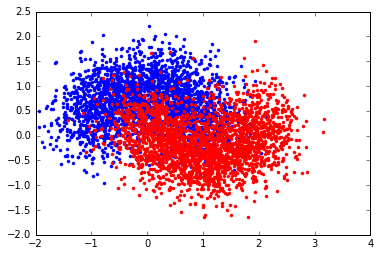

In [2]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=5000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.');
plt.plot(data[label1,0], data[label1,1],'r.');

In [3]:
%rm -rf _models
scores, confusions, predictions = poly(data,label, n_folds=8, verbose=1, feature_selection=False, scoring='f1', concurrency=4)

INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Nearest Neighbors          4:  Train 0.86/ Test 0.86, 0.13 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          0:  Train 0.86/ Test 0.85, 0.22 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      4:  Train 0.86/ Test 0.87, 29.88 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      0:  Train 0.85/ Test 0.85, 31.98 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          5:  Train 0.86/ Test 0.84, 0.14 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          1:  Train 0.86/ Test 0.85, 0.20 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      5:  Train 0.86/ Test 0.84, 52.06 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      1:  Train 0.86/ Test 0.86, 41.83 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          6:  Train 0.86/ Test 0.84, 0.21 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          2:  Tra

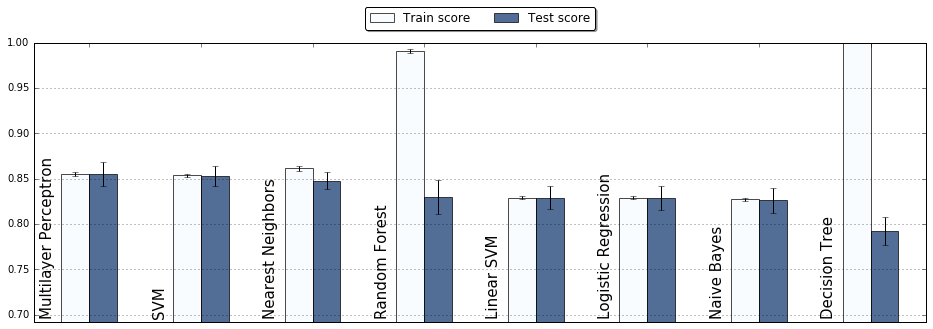

In [7]:
plot(scores)

In [5]:
for key, val in confusions.items():
    print(key)
    print(val)

Linear SVM
[[ 2074.   426.]
 [  427.  2073.]]
Multilayer Perceptron
[[ 2138.   362.]
 [  362.  2138.]]
Nearest Neighbors
[[ 2159.   341.]
 [  410.  2090.]]
Decision Tree
[[ 1982.   518.]
 [  520.  1980.]]
SVM
[[ 2146.   354.]
 [  378.  2122.]]
Random Forest
[[ 2099.   401.]
 [  442.  2058.]]
Naive Bayes
[[ 2061.   439.]
 [  431.  2069.]]
Logistic Regression
[[ 2074.   426.]
 [  430.  2070.]]


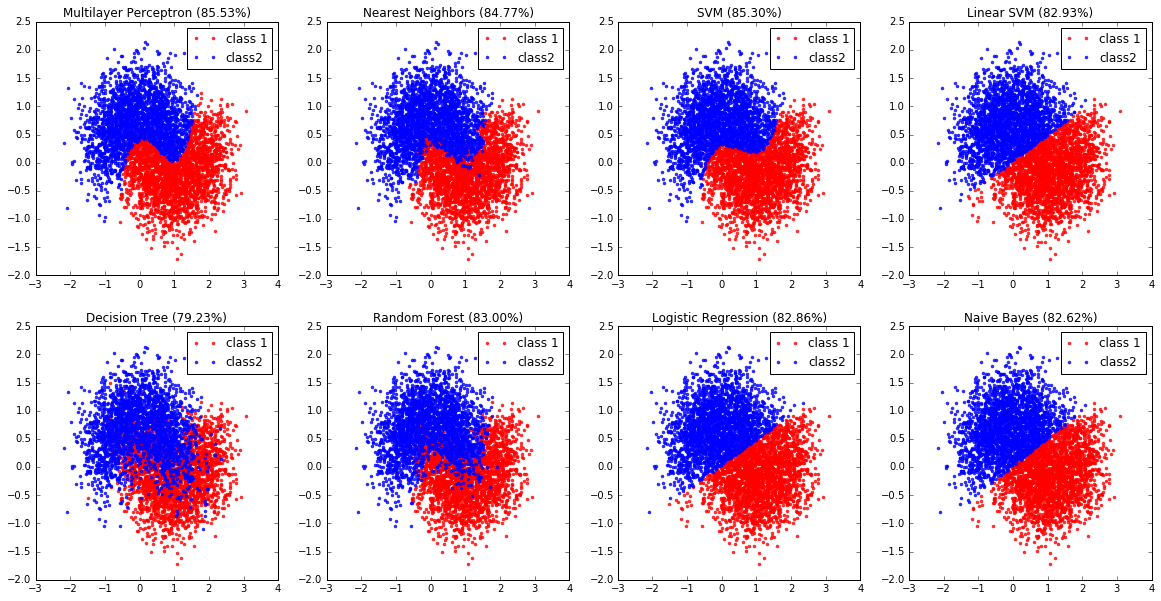

In [11]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))